### CAR RADIOS DATASET


In [22]:
import pandas as pd

In [23]:
df_car = pd.read_excel('/content/data_carradios.xlsx')
df_car

,perc_defec,bdate,team,training,datep,prizeq,prized
0,0.00,1981-07-02,8,1,2021-07-01,0,0
1,36.32,1992-06-14,6,0,2021-07-02,0,0
2,48.91,2003-05-28,7,0,2021-07-05,500,0
3,20.36,1992-06-14,10,0,2021-07-06,0,0
4,42.07,2003-05-28,7,0,2021-07-07,500,0
...,...,...,...,...,...,...,...
995,21.50,1981-07-02,1,0,2021-12-13,0,0
996,7.53,1981-07-02,2,0,2021-12-14,500,600
997,27.70,1997-12-05,10,0,2021-12-15,0,0
998,0.00,1986-12-23,5,0,2021-12-16,0,600


Para calcular a idade dos trabalhadores temos de substrair a sua data de nascimento à data atual.

Y => years

In [24]:
import datetime

In [31]:
(datetime.datetime.now()-df_car['bdate'])

0     15228 days 21:11:18.386896
1     11228 days 21:11:18.386896
2      7228 days 21:11:18.386896
3     11228 days 21:11:18.386896
4      7228 days 21:11:18.386896
                 ...            
995   15228 days 21:11:18.386896
996   15228 days 21:11:18.386896
997    9228 days 21:11:18.386896
998   13228 days 21:11:18.386896
999   13228 days 21:11:18.386896
Name: bdate, Length: 1000, dtype: timedelta64[ns]

Para colocar em anos

In [30]:
(datetime.datetime.now()-df_car['bdate']).astype('<m8[Y]')


0      41.0
1      30.0
2      19.0
3      30.0
4      19.0
       ... 
995    41.0
996    41.0
997    25.0
998    36.0
999    36.0
Name: bdate, Length: 1000, dtype: float64

Podemos criar um coluna com esta variável idade.

Para que a variável apareça em anos fazer `.astype('<m8[Y]')`


Para passar os valores de float para int colocamos `.astype('int64')`


In [29]:
df_car['age'] = (datetime.datetime.now()-df_car['bdate']).astype('<m8[Y]').astype('int64')
df_car

,perc_defec,bdate,team,training,datep,prizeq,prized,age
0,0.00,1981-07-02,8,1,2021-07-01,0,0,41
1,36.32,1992-06-14,6,0,2021-07-02,0,0,30
2,48.91,2003-05-28,7,0,2021-07-05,500,0,19
3,20.36,1992-06-14,10,0,2021-07-06,0,0,30
4,42.07,2003-05-28,7,0,2021-07-07,500,0,19
...,...,...,...,...,...,...,...,...
995,21.50,1981-07-02,1,0,2021-12-13,0,0,41
996,7.53,1981-07-02,2,0,2021-12-14,500,600,41
997,27.70,1997-12-05,10,0,2021-12-15,0,0,25
998,0.00,1986-12-23,5,0,2021-12-16,0,600,36


**Exercise 1 - Use `seaborn.pairplot` method to find the correlated and the uncorrelated pairs of variables.**

Podemos verificar o impacto de cada variável independente na variável dependente.

Se repararmos no dataset temos uma variável que é a data de produção, mas tornar-se-ia mais fácil se tivessemos apenas o dia da semana. Nesse sentido, podemos criar uma nova coluna assim:

In [32]:
df_car['weekdp'] = df_car['datep'].dt.weekday
df_car

,perc_defec,bdate,team,training,datep,prizeq,prized,age,weekdp
0,0.00,1981-07-02,8,1,2021-07-01,0,0,41,3
1,36.32,1992-06-14,6,0,2021-07-02,0,0,30,4
2,48.91,2003-05-28,7,0,2021-07-05,500,0,19,0
3,20.36,1992-06-14,10,0,2021-07-06,0,0,30,1
4,42.07,2003-05-28,7,0,2021-07-07,500,0,19,2
...,...,...,...,...,...,...,...,...,...
995,21.50,1981-07-02,1,0,2021-12-13,0,0,41,0
996,7.53,1981-07-02,2,0,2021-12-14,500,600,41,1
997,27.70,1997-12-05,10,0,2021-12-15,0,0,25,2
998,0.00,1986-12-23,5,0,2021-12-16,0,600,36,3


ELIMINATE COLUMS

No entanto, agora por causa do problema da correlação temos de eliminar a coluna da data de produção e a coluna da data de nascimento (porque estão relacionadas com o dia da semana e a idade, respetivamente).

Para isso usámos a função `df_car.drop(['x', 'y'], axis=1)`, onde x e y são as colunas que queremos eliminar (podemos eliminar quantas quisermos).

In [33]:
df_car.drop(['bdate', 'datep'], axis=1)

,perc_defec,team,training,prizeq,prized,age,weekdp
0,0.00,8,1,0,0,41,3
1,36.32,6,0,0,0,30,4
2,48.91,7,0,500,0,19,0
3,20.36,10,0,0,0,30,1
4,42.07,7,0,500,0,19,2
...,...,...,...,...,...,...,...
995,21.50,1,0,0,0,41,0
996,7.53,2,0,500,600,41,1
997,27.70,10,0,0,0,25,2
998,0.00,5,0,0,600,36,3


Analyzing the relationship between the variables through plots.

In [34]:
import seaborn as sns

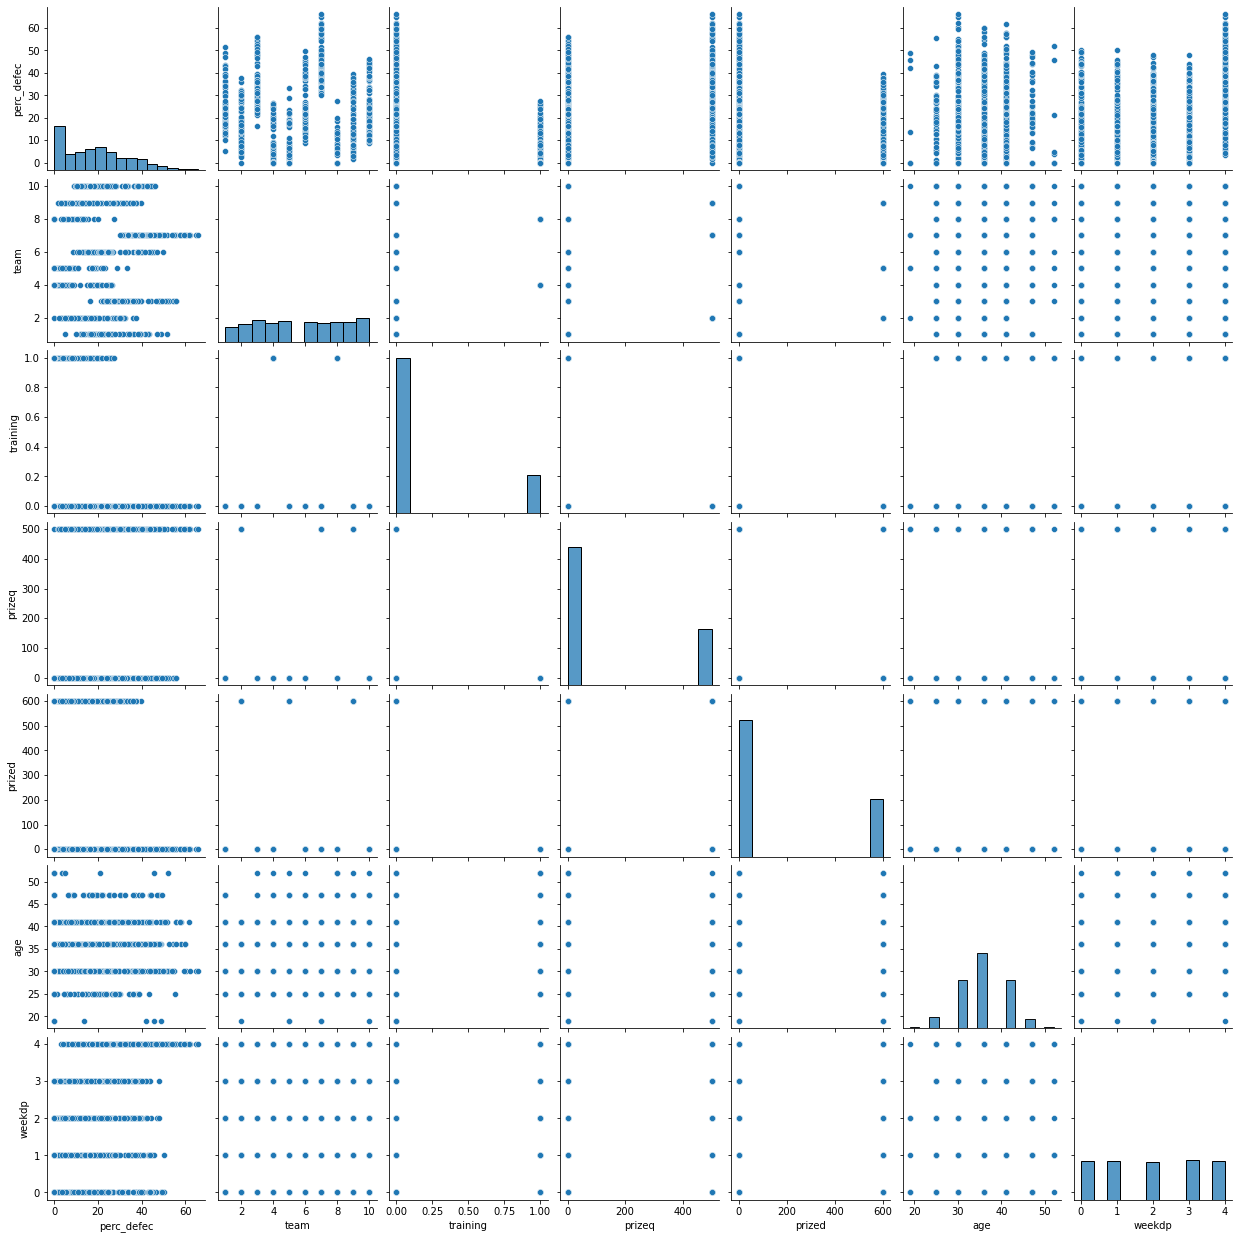

In [36]:
sns.pairplot(df_car)

# IMPORTANT

**NOTE ABOUT THE LEGENDS OF THE GRAPHS:**

O título dos gráficos do lado esquerdo só são válidos para os gráficos que não estão nas diagonais, no caso destes o título deveria ser frequência.

**Exercise 2 - What are the effects on the outcome variable that you infer from the pairplot?**

ANALYSIS OF THE PLOTS

* 1st plot => is a histogram => distribution of the percentage of defective radios.
* 2nd plot
* 3rd plot => the defectives are lower when there is training and when the training is zero the percentage of defectives is near to zero => so, this means that training can have a helpful impact on the number of defectives.
* 4th plot => the greater the price of quantity (prizeq) the higher the percentage of defective radios.
* 5th plot => the prized (prize for decreasing defectives) tends to decrease the rate of defectives.
age has no impact on the rate of defectives => if we were creating a prediction model, maybe we should remove the variable age.

Also, we can draw an histogram of the dependent variable.

<AxesSubplot:xlabel='perc_defec', ylabel='Count'>

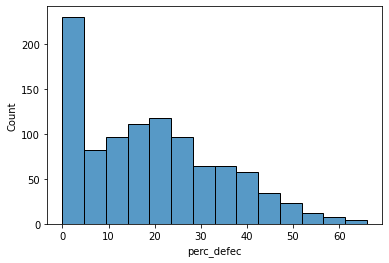

In [38]:
sns.histplot(df_car['perc_defec'])

No 2º passo anterior fizemos o `pairplot` geral, ou seja, com todos os dados agrupados, mas podemos utilizar uma matiz (`hue`), ou seja, um conjunto de cores mediante uma variável e as suas classes. Podemos utilizar, por exemplo, o dia da semana.


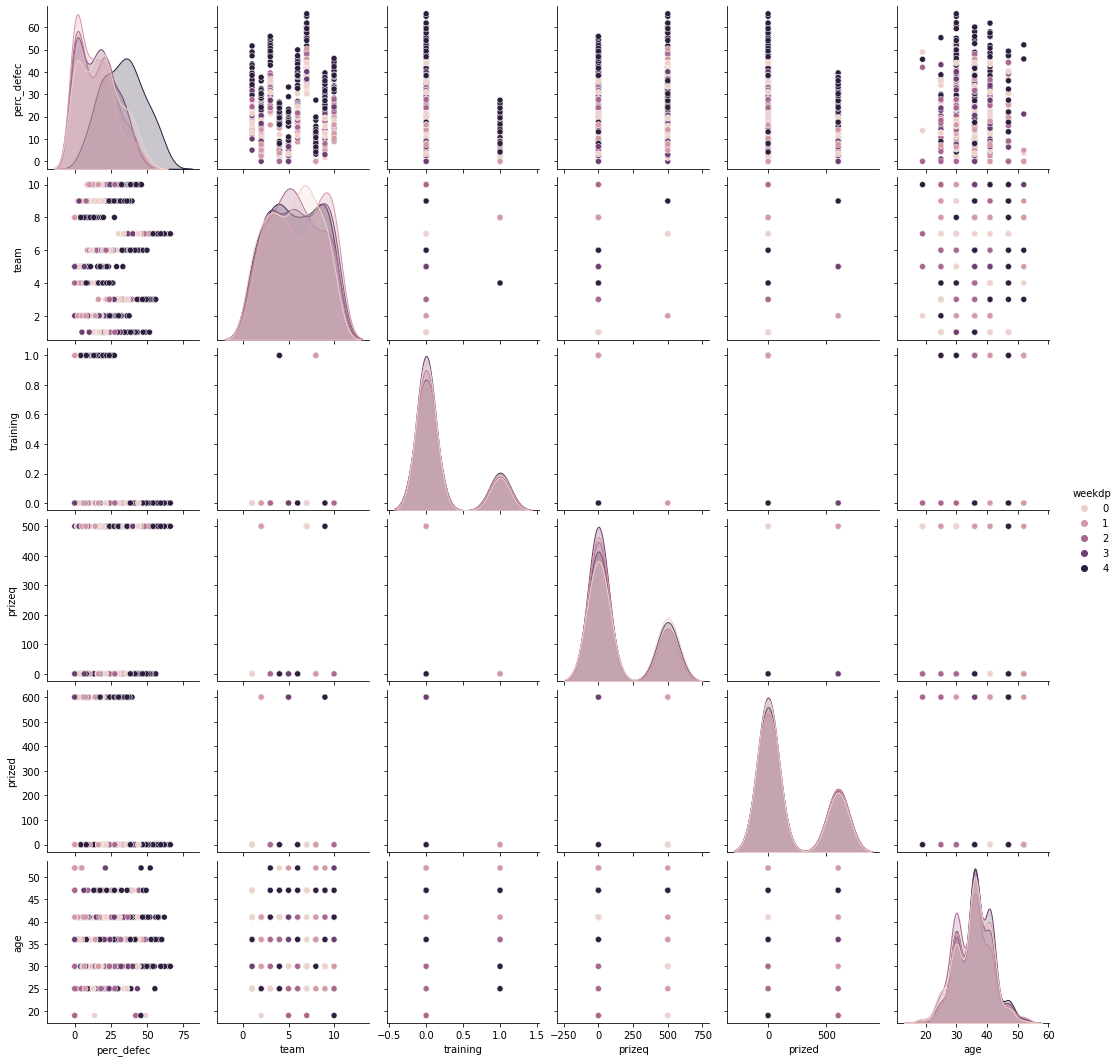

In [39]:
sns.pairplot(df_car, hue = 'weekdp')

**ANALYSIS OF THE PLOTS**
* 1st plo => on Fridays (see the legend) the percentage of defective radios tend to be higher.


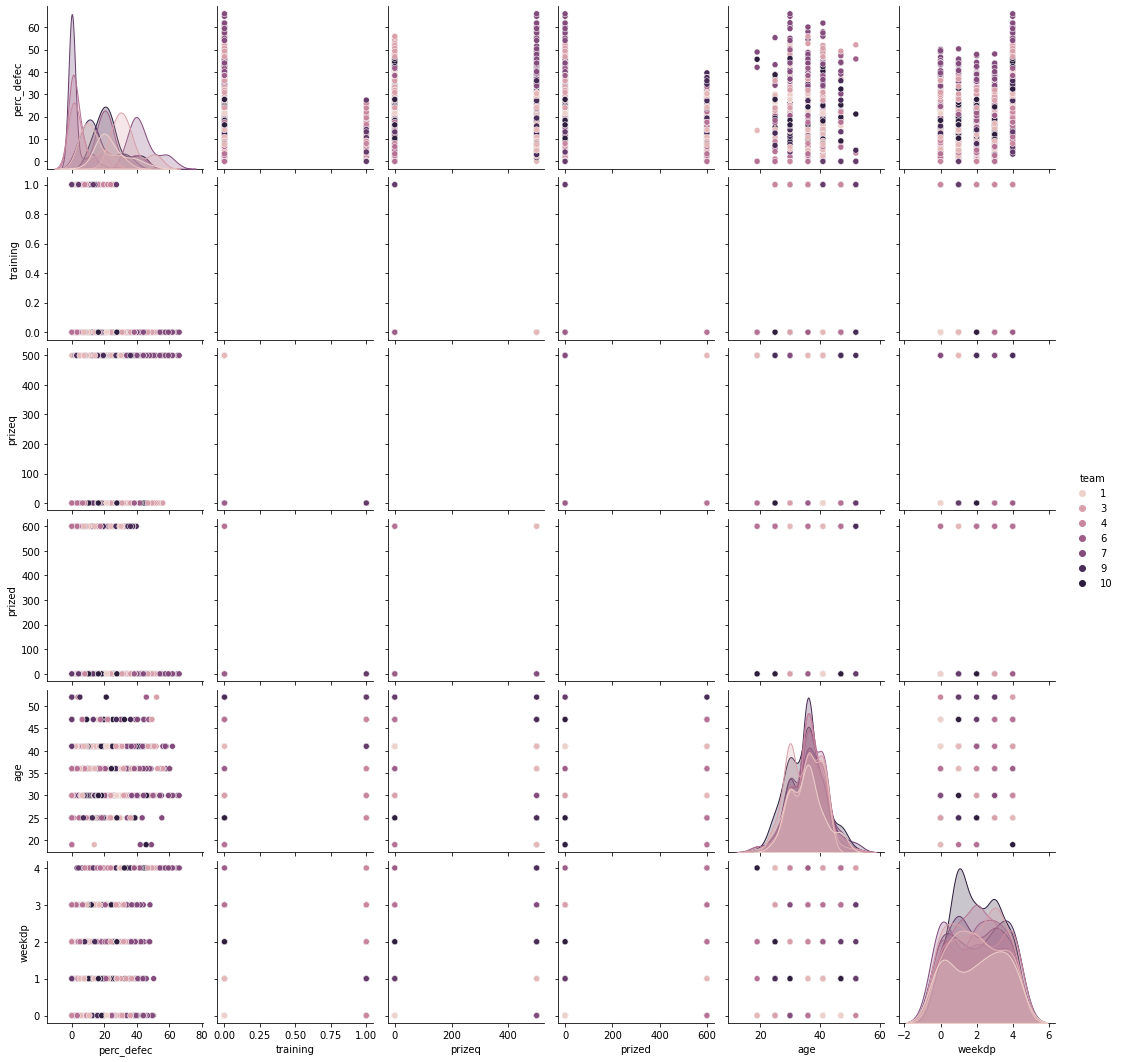

In [40]:
sns.pairplot(df_car, hue = 'team')

Outro tipo de gráfico que podemos fazer é o `boxplot`.

Neste caso, temos de escolher as variáveis que queremos para cada um dos eixos.

<AxesSubplot:xlabel='team', ylabel='perc_defec'>

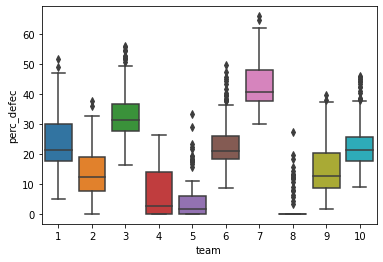

In [41]:
sns.boxplot(x = df_car['team'], y = df_car['perc_defec'])

Since the boxplot shows diversity of the medians, then the teams are not equally good as producing less defectives. The team 7 has the higher percentage of defectives and the team 5 the lower.

<AxesSubplot:xlabel='training', ylabel='perc_defec'>

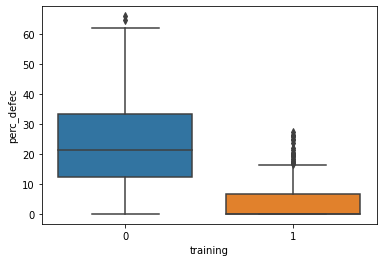

In [43]:
sns.boxplot(x = df_car['training'], y = df_car['perc_defec'])

As we can see, the training has a huge impact on the percentage of defectives.

**Exercise 3 - Which variables you should ponder to remove?** 

To verify which variables we must remove, we should analyze the correlation between the variables. To do this, we must calculate the coeficient of correlation `corr`.

CORRELATION BETWEEN VARIABLES

If one variable , X1, is highly correlated with another variable, X2, then maybe we should remove one of them. (because if they are very correlated they are almost equal)

In [44]:
correlation = df_car.corr()
correlation

,perc_defec,team,training,prizeq,prized,age,weekdp
perc_defec,1.000000,-0.031276,-0.484096,0.221585,-0.336881,-0.022036,0.314286
team,-0.031276,1.000000,0.051913,0.094554,-0.059000,0.011077,0.002018
training,-0.484096,0.051913,1.000000,-0.317778,-0.324751,0.059394,0.014869
prizeq,0.221585,0.094554,-0.317778,1.000000,0.515499,-0.018963,-0.023850
prized,-0.336881,-0.059000,-0.324751,0.515499,1.000000,-0.013490,0.007126
age,-0.022036,0.011077,0.059394,-0.018963,-0.013490,1.000000,0.033201
weekdp,0.314286,0.002018,0.014869,-0.023850,0.007126,0.033201,1.000000


In order to transform this values in something more easy to visualize with colours, so we must use `heatmap`.


<AxesSubplot:>

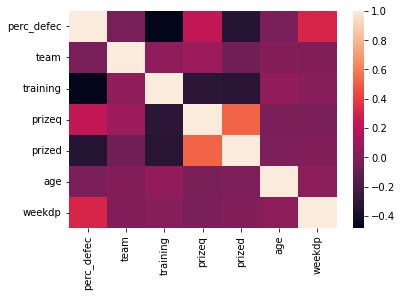

In [45]:
sns.heatmap(correlation)

Looking at this `heatmap` we can conclude that we must have to remove one of the variables related to prize because they are high correlated with each other and can jeopardize the analysis. Maybe one of them is enough.

**Exercise 4 - Approach the previous three questions ignoring the `seaborn.pairplot` method.** 